In [ ]:
%%capture
import pandas as pd 
import datetime as dt 
from sklearn.model_selection import train_test_split
import sys
!pip install category_encoders==2.*
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as sm
from sklearn.linear_model import Ridge
from xgboost import XGBRFRegressor
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
!pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
from sklearn.metrics import confusion_matrix

In [ ]:
!unzip '/content/ks-projects-201801.csv.zip'

Archive:  /content/ks-projects-201801.csv.zip
replace ks-projects-201801.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ks-projects-201801.csv  


In [ ]:
df =  pd.read_csv('ks-projects-201801.csv', index_col='ID')

df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
df.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [ ]:
df['currency'].value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [ ]:
df['category'].value_counts()

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [ ]:
df['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [ ]:
df['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [ ]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [ ]:
def wrangle(state):
  if (state == 'successful'):
    return "1"
  else:
      return "0"

In [ ]:
df['state'] = df['state'].apply(wrangle)

In [ ]:
df['state'].value_counts()

0    244705
1    133956
Name: state, dtype: int64

In [ ]:
# Engineered Features

In [ ]:
# creating a feature that describes total fraud on a project
# (total pledged -total pledged real)

In [ ]:
df['total_fraud'] = df['usd pledged'] - df['usd_pledged_real']

In [ ]:
df['total_fraud'].head()

ID
1000002330       0.0
1000003930   -2321.0
1000004038       0.0
1000007540       0.0
1000011046       0.0
Name: total_fraud, dtype: float64

In [ ]:
# creating a feature that determines total value per backer

In [ ]:
df['backer_value'] = (df['pledged'] / df['backers']).dropna()

In [ ]:
df['goal_met'] = (df['goal'] - df ['pledged'])

In [ ]:
df['goal_met'].head()

ID
1000002330     1000.0
1000003930    27579.0
1000004038    44780.0
1000007540     4999.0
1000011046    18217.0
Name: goal_met, dtype: float64

In [ ]:
def goal(goal_met):
  if goal_met == 0:
    return "Goal Met"
  elif goal_met > 0:
      return "Goal Failed"
  else:
      return "Goal Exceeded"

In [ ]:
df['goal_met'] = df['goal_met'].apply(goal)

In [ ]:
df['goal_met'].head()

ID
1000002330    Goal Failed
1000003930    Goal Failed
1000004038    Goal Failed
1000007540    Goal Failed
1000011046    Goal Failed
Name: goal_met, dtype: object

In [ ]:
df = df.dropna()

In [ ]:
df['backer_value'].head()

ID
1000003930    161.400000
1000004038     73.333333
1000007540      1.000000
1000011046     91.642857
1000014025    233.816964
Name: backer_value, dtype: float64

In [ ]:
y = df['state']
X = df.drop(['state', 'name', 'launched', 'deadline', 'backer_value', 'goal_met', 'goal'], axis=1)

KeyError: ignored

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['category', 'main_category', 'currency',
                                     'country'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
print('Training MAE:', mean_absolute_error(y_train, model.predict(X_train)))
print('Validation MAE:', mean_absolute_error(y_val, model.predict(X_val)))

Training MAE: 0.4372088056280501
Validation MAE: 0.4365223652465171


In [ ]:
model2 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(k=25),
    Ridge(alpha=.02, normalize=True)
)

model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['category', 'main_category', 'currency',
                                     'country'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selectkbest',
                 SelectKBest(k=25,
                             score_func=<function f_classif at 0x7f60d58a7d08>)),
                ('ridge',
                 Ridge(alpha=0.02, copy_X=True, fit_intercept=True,
                       ma

In [ ]:
print('Training MAE:', mean_absolute_error(y_train, model2.predict(X_train)))
print('Validation MAE:', mean_absolute_error(y_val, model2.predict(X_val)))

Training MAE: 0.4480545972764755
Validation MAE: 0.44699031667184363


In [ ]:
perm_imp = permutation_importance(model2, X_val, y_val, n_jobs=-1)

In [ ]:
data = {'importances_mean' : perm_imp['importances_mean'],
        'importances_std' : perm_imp['importances_std']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values('importances_mean', ascending=True, inplace=True)

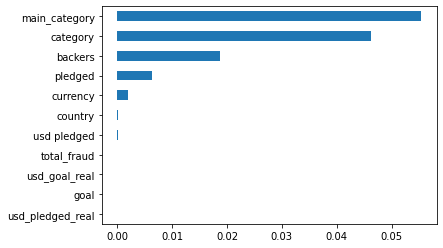

In [ ]:
df.head(20).importances_mean.plot(kind='barh')